<a href="https://colab.research.google.com/github/Arnab-Saha-Authro-botlvl100/23531677_Arnab_Saha_Authro/blob/main/starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌦️ WeatherWise – Starter Notebook

Welcome to your **WeatherWise** project notebook! This scaffold is designed to help you build your weather advisor app using Python, visualisations, and AI-enhanced development.

---

📄 **Full Assignment Specification**  
See [`ASSIGNMENT.md`](ASSIGNMENT.md) or check the LMS for full details.

📝 **Quick Refresher**  
A one-page summary is available in [`resources/assignment-summary.md`](resources/assignment-summary.md).

---

🧠 **This Notebook Structure is Optional**  
You’re encouraged to reorganise, rename sections, or remove scaffold cells if you prefer — as long as your final version meets the requirements.

✅ You may delete this note before submission.



## 🧰 Setup and Imports

This section imports commonly used packages and installs any additional tools used in the project.

- You may not need all of these unless you're using specific features (e.g. visualisations, advanced prompting).
- The notebook assumes the following packages are **pre-installed** in the provided environment or installable via pip:
  - `requests`, `matplotlib`, `pyinputplus`
  - `fetch-my-weather` (for accessing weather data easily)
  - `hands-on-ai` (for AI logging, comparisons, or prompting tools)

If you're running this notebook in **Google Colab**, uncomment the following lines to install the required packages.


In [3]:
# 🧪 Optional packages — uncomment if needed in Colab or JupyterHub
!pip install fetch-my-weather
!pip install hands-on-ai
!pip install pyinputplus

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.5/155.5 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 79.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.0/71.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.0/352.0 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.7/517.7 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 102.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 456.8/456.8 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 109.9 MB/s eta 0:00:00
  Attempting uninstall: jiter
    Found existi

In [4]:
import os

os.environ['HANDS_ON_AI_SERVER'] = 'http://ollama.serveur.au'
os.environ['HANDS_ON_AI_MODEL'] = 'granite3.2'
os.environ['HANDS_ON_AI_API_KEY'] = input('Enter your API key: ')

# 45acce96b9ab4addb25850b8c95a33a6.WLCIBa5hwmZS3Ia2KP-3Zrqs

Enter your API key: 45acce96b9ab4addb25850b8c95a33a6.WLCIBa5hwmZS3Ia2KP-3Zrqs


## 📦 Setup and Configuration
Import required packages and setup environment.

In [37]:
import requests
import matplotlib.pyplot as plt
import pyinputplus as pyip
# ✅ Import after installing (if needed)
from fetch_my_weather import get_weather
from hands_on_ai.chat import get_response
import requests
from datetime import datetime, timedelta, timezone
from collections import defaultdict
import pandas as pd
from typing import Dict, Any, List, Union
# Add any other setup code here

## 🌤️ Weather Data Functions

In [75]:

def get_weather_data(location: str, forecast_days: int = 5, units: str = 'metric') -> Union[List[Dict[str, float]], None]:
    """
    Fetches weather forecast data from OpenWeatherMap and returns daily summaries including
    min, avg, max temperature, precipitation, and chance of rain.
    """
    try:
        forecast_days = max(1, min(forecast_days, 10))  # Clamp days

        # Get coordinates
        geo_url = f"http://api.openweathermap.org/geo/1.0/direct?q={location}&limit=1&appid={API_KEY}"
        geo_data = requests.get(geo_url, timeout=10).json()
        if not geo_data:
            print(f"Location '{location}' not found.")
            return None
        lat, lon = geo_data[0]["lat"], geo_data[0]["lon"]

        # Forecast data (3-hour intervals)
        forecast_url = f"https://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&units={units}&appid={API_KEY}"
        forecast_data = requests.get(forecast_url, timeout=10).json()

        # Aggregate by day
        daily_forecast: Dict[str, List[Dict]] = defaultdict(list)
        tz_offset = forecast_data.get("city", {}).get("timezone", 0)
        for entry in forecast_data.get("list", []):
            dt_utc = datetime.fromtimestamp(entry["dt"], tz=timezone.utc)
            local_date = dt_utc + timedelta(seconds=tz_offset)
            date_str = local_date.strftime("%Y-%m-%d")
            daily_forecast[date_str].append(entry)

        # Summarize for chart
        chart_data = []
        for i, (date, entries) in enumerate(daily_forecast.items()):
            if i >= forecast_days:
                break

            temps = [e["main"]["temp"] for e in entries]

            # Precipitation: sum rain + snow if present
            precip_values = []
            for e in entries:
                rain = e.get("rain", {}).get("3h", 0)
                snow = e.get("snow", {}).get("3h", 0)
                precip_values.append(rain + snow)
            total_precip = sum(precip_values)

            # Chance of rain: average 'pop' value (0-1) as percentage
            pop_values = [e.get("pop", 0) for e in entries]
            avg_pop = sum(pop_values)/len(pop_values) * 100

            chart_data.append({
                "date": date,
                "mintemp": min(temps),
                "avgtemp": sum(temps)/len(temps),
                "maxtemp": max(temps),
                "precipMM": total_precip,
                "chanceofrain": avg_pop
            })

        return chart_data

    except requests.RequestException as e:
        print(f"Network/API error: {e}")
        return None
    except Exception as e:
        print(f"Unexpected error: {e}")
        return None

## 📊 Visualisation Functions

In [59]:

def create_temperature_visualisation(weather_data: List[Dict[str, float]], location: str = "Location", units: str = "metric") -> None:

    if not weather_data or not isinstance(weather_data, list):
        print("Invalid weather data for visualization.")
        return

    df = pd.DataFrame(weather_data)
    day_labels = pd.to_datetime(df['date']).dt.strftime("%b %d")
    x = range(len(df))
    width = 0.25

    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(12, 6))

    ax.bar([p - width for p in x], df['mintemp'], width, label='Min Temp', color='skyblue')
    ax.bar(x, df['avgtemp'], width, label='Avg Temp', color='orange')
    ax.bar([p + width for p in x], df['maxtemp'], width, label='Max Temp', color='salmon')

    # Add value labels
    for i, row in df.iterrows():
        ax.text(i - width, row['mintemp'] + 0.1, f"{row['mintemp']:.1f}°", ha='center', fontsize=9)
        ax.text(i, row['avgtemp'] + 0.1, f"{row['avgtemp']:.1f}°", ha='center', fontsize=9)
        ax.text(i + width, row['maxtemp'] + 0.1, f"{row['maxtemp']:.1f}°", ha='center', fontsize=9)

    ax.set_title(f"{location} - Temperature Forecast", fontsize=16, fontweight='bold')
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Temperature (°C)" if units=="metric" else "Temperature (°F)", fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(day_labels, rotation=45, ha='right')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


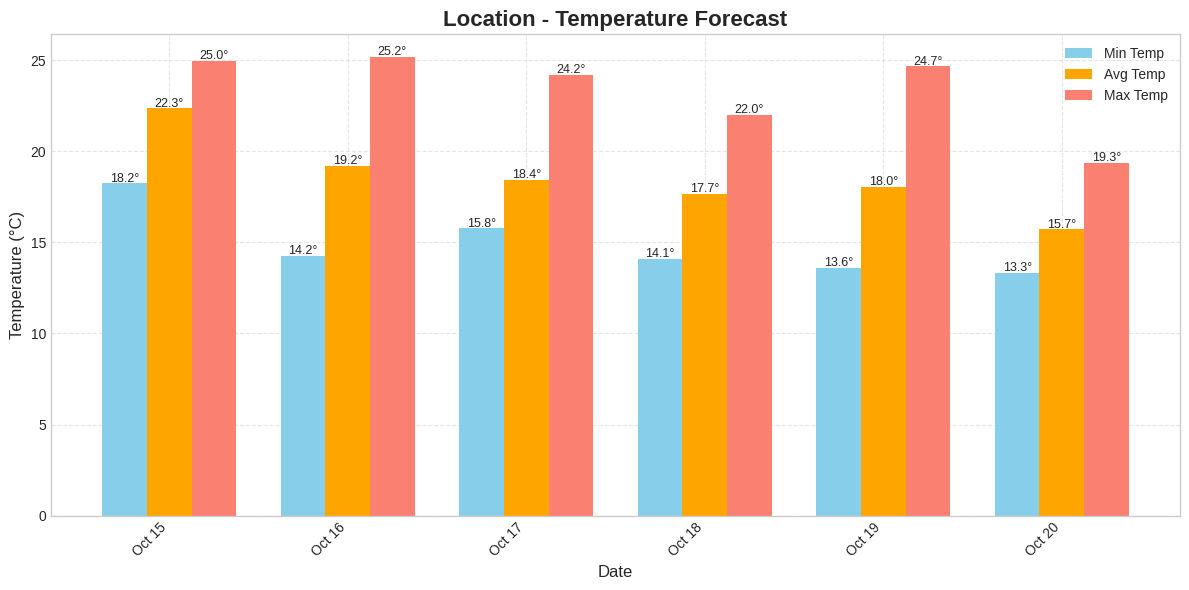

In [76]:
weather_data = get_weather_data('Bangladesh', 8)
create_temperature_visualisation(weather_data)

In [77]:

def create_precipitation_visualisation(weather_data, output_type='display'):

    if not weather_data or not isinstance(weather_data, list):
        return "Invalid weather data"

    df = pd.DataFrame(weather_data)

    required_cols = {"date", "precipMM", "chanceofrain"}
    if not required_cols.issubset(df.columns):
        return f"Missing columns in weather data. Found: {list(df.columns)}"

    df["precipMM"] = pd.to_numeric(df["precipMM"], errors="coerce").fillna(0)
    df["chanceofrain"] = pd.to_numeric(df["chanceofrain"], errors="coerce").fillna(0).clip(0, 100)

    fig, ax1 = plt.subplots(figsize=(9, 5))

    ax1.bar(df["date"], df["precipMM"], color="royalblue", alpha=0.7, label="Precipitation (mm)")
    ax1.set_ylabel("Precipitation (mm)", color="royalblue")
    ax1.tick_params(axis="y", labelcolor="royalblue")
    if df["precipMM"].max() == 0:
        ax1.set_ylim(0, 1)

    ax2 = ax1.twinx()
    ax2.plot(df["date"], df["chanceofrain"], color="darkorange", marker="o", linewidth=2, label="Chance of Rain (%)")
    ax2.set_ylabel("Chance of Rain (%)", color="darkorange")
    ax2.tick_params(axis="y", labelcolor="darkorange")
    ax2.set_ylim(0, 100)

    plt.title("Precipitation & Chance of Rain Forecast", fontsize=13, fontweight='bold')
    fig.autofmt_xdate(rotation=30)
    fig.tight_layout()

    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc="upper right")

    if output_type == "figure":
        return fig
    else:
        plt.show()


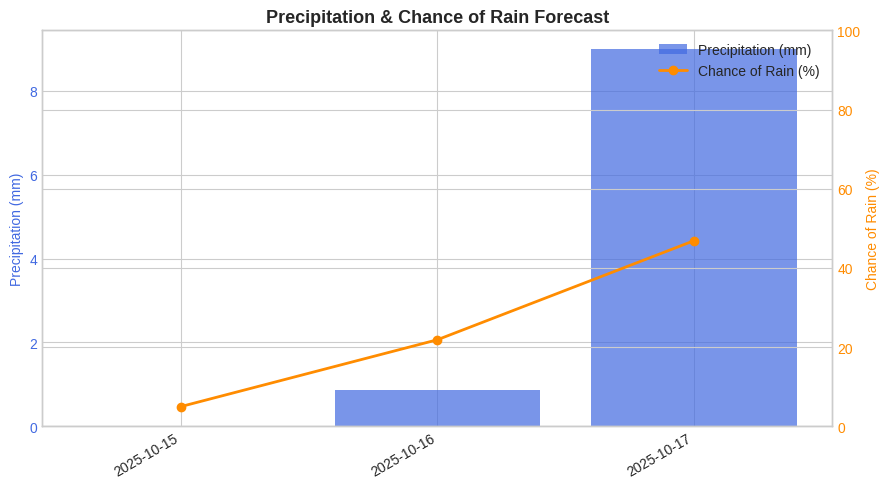

Visualization displayed successfully


In [79]:
weather_data = get_weather_data('bangladesh', 3)
print(create_precipitation_visualisation(weather_data))


## 🤖 Natural Language Processing

In [80]:
def parse_weather_question(question: str) -> dict:

    question = question.lower()
    parsed = {"location": None, "attribute": None}

    # Determine attribute
    if "temperature" in question or "temp" in question:
        parsed["attribute"] = "temperature"
    elif "rain" in question or "possibility of rain" in question:
        parsed["attribute"] = "chanceofrain"
    elif "precipitation" in question or "rainfall" in question:
        parsed["attribute"] = "precipMM"

    # Extract location (simple heuristic: last word in the question that is not 'of' or 'the')
    words = question.replace('?', '').split()
    stop_words = {"of", "the", "in", "at"}
    location_candidates = [w for w in words if w not in stop_words and w.isalpha()]
    if location_candidates:
        parsed["location"] = location_candidates[-1]

    return parsed


## 🧭 User Interface

🌤 Welcome to the Weather Assistant 🌤
Enter the city/location: india
Select what you want to know:
1. Temperature
2. Precipitation
1

Select day(s) for forecast:
1. Today
2. Tomorrow
3. Custom range (e.g., 1-3 for next 3 days)
Please select one of the following:
1. Today
2. Tomorrow
3. Custom
3
Start day (1-6): 1
End day (1-6): 3


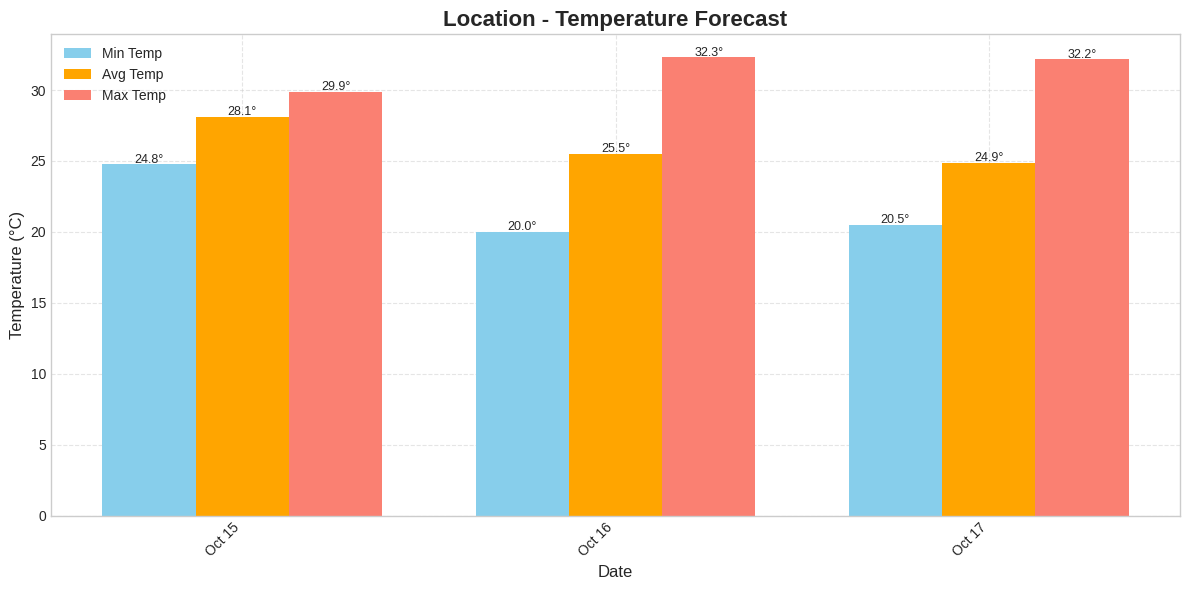


Wednesday, 15 Oct 2025: Temperature in India - Min 24.8°C, Avg 28.1°C, Max 29.9°C
Thursday, 16 Oct 2025: Temperature in India - Min 20.0°C, Avg 25.5°C, Max 32.3°C
Friday, 17 Oct 2025: Temperature in India - Min 20.5°C, Avg 24.9°C, Max 32.2°C



In [110]:
import pyinputplus as pyip
from datetime import datetime, timedelta

def weather_menu():
    """
    Interactive weather menu using pyinputplus with date range selection
    """
    print("🌤 Welcome to the Weather Assistant 🌤")

    # Ask for location
    location = pyip.inputStr("Enter the city/location: ")

    # Ask for attribute
    attribute = pyip.inputMenu(
        ['Temperature', 'Precipitation'],
        numbered=True,
        prompt="Select what you want to know:\n",
    )

    # Map attribute to internal keys
    attr_map = {
        'Temperature': 'temperature',
        'Precipitation': 'precipMM'
    }
    selected_attr = attr_map[attribute]

    # Get weather data (up to 7 days)
    weather_data = get_weather_data(location, forecast_days=7)
    if not weather_data:
        print(f"Could not fetch weather data for {location}.")
        return

    # Ask for date range
    print("\nSelect day(s) for forecast:")
    print("1. Today")
    print("2. Tomorrow")
    print("3. Custom range (e.g., 1-3 for next 3 days)")

    choice = pyip.inputMenu(['Today', 'Tomorrow', 'Custom'], numbered=True)

    if choice == 'Today':
        selected_data = [weather_data[0]]
    elif choice == 'Tomorrow':
        if len(weather_data) < 2:
            print("Tomorrow's forecast is not available.")
            return
        selected_data = [weather_data[1]]
    elif choice == 'Custom':
        start_day = pyip.inputInt(f"Start day (1-{len(weather_data)}): ", min=1, max=len(weather_data))
        end_day = pyip.inputInt(f"End day ({start_day}-{len(weather_data)}): ", min=start_day, max=len(weather_data))
        selected_data = weather_data[start_day-1:end_day]

    # Generate response for the selected range (pass the **list**)
    parsed_question = {'location': location, 'attribute': selected_attr}
    response = generate_weather_response(parsed_question, selected_data)
    print("\n" + response + "\n")

# Run the menu
weather_menu()


## 🧩 Main Application Logic

In [108]:
def generate_weather_response(parsed_question: dict, weather_data: list) -> str:
    """
    Generate natural language response for a weather query.
    Shows one graph for the selected date range.
    """
    if not parsed_question or not weather_data:
        return "Sorry, I could not understand your question or weather data is unavailable."

    attribute = parsed_question.get("attribute")
    location = parsed_question.get("location", "this location")

    # Build text response for all selected days
    response_lines = []
    for day in weather_data:
        date_str = day.get("date", "")
        friendly_date = datetime.strptime(date_str, "%Y-%m-%d").strftime("%A, %d %b %Y") if date_str else "Unknown date"

        if attribute == "temperature":
            line = (f"{friendly_date}: Temperature in {location.title()} - "
                    f"Min {day['mintemp']:.1f}°C, "
                    f"Avg {day['avgtemp']:.1f}°C, "
                    f"Max {day['maxtemp']:.1f}°C")
        elif attribute == "precipMM":
            line = f"{friendly_date}: Expected precipitation in {location.title()} - {day.get('precipMM', 0):.1f} mm"
        elif attribute == "chanceofrain":
            line = f"{friendly_date}: Chance of rain in {location.title()} - {day.get('chanceofrain', 0):.1f}%"
        else:
            line = f"{friendly_date}: Could not identify the weather attribute."

        response_lines.append(line)

    # Call visualization **once** for the full range
    try:
        if attribute == "temperature":
            create_temperature_visualisation(weather_data)
        elif attribute in ["precipMM", "chanceofrain"]:
            create_precipitation_visualisation(weather_data)
    except Exception as e:
        response_lines.append(f"Could not generate chart: {e}")

    return "\n".join(response_lines)


## 🧪 Testing and Examples

In [14]:
# Include sample input/output for each function

## 🗂️ AI Prompting Log (Optional)
Add markdown cells here summarising prompts used or link to AI conversations in the `ai-conversations/` folder.